In [4]:
import matplotlib
%matplotlib inline
# matplotlib.rcParams['backend'] = "TkAgg"
from Cell2D import Cell2D, Cell2DViewer
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import rc
rc('animation', html='html5')


class Cell3DViewer(Cell2DViewer):
    cmap = matplotlib.cm.get_cmap('RdYlBu')
    def __init__(self, viewee):
        Cell2DViewer.__init__(self,viewee)
        self.fig = plt.figure()
        self.fig.set_size_inches(10,10, True)
        self.ax1 = self.fig.add_subplot(111, projection='3d')
        self.ax1.set_axis_off()
        self.ax1.set_zlim(0,10)
    
    def draw_array(self, array=None, cmap=None, **kwds):
        self.get_bars()
#         self.fig.canvas.draw()
        
    def get_bars(self):    
        top = self.viewee.array.flatten()
        n,m = self.viewee.array.shape
        bottom = np.zeros(n*m)
        width = depth = 1
        _xx, _yy = np.meshgrid(np.arange(n), np.arange(m))
        x, y = _xx.ravel(), _yy.ravel()
#         norm = matplotlib.colors.Normalize(vmin=0,vmax=10)
        colors = [self.cmap(val/5) for val in top]
        self.bars = self.ax1.bar3d(x, y, bottom, width, depth, top, color=colors)
        
    def animate(self, frames=20, interval=200, grid=False):
        """Creates an animation.

        frames: number of frames to draw

        interval: time between frames in ms
        """
        self.draw(grid)
        anim = animation.FuncAnimation(self.fig, self.animate_func,
                                       init_func=self.init_func,
                                       frames=frames, interval=interval)
        return anim
        
    def live_animate(self):
        plt.show(block=False)
        for i in range(100):
            self.step()
            self.get_bars()
            self.fig.canvas.draw()
            time.sleep(0.01)
            self.bars.remove()

                
    def animate_func(self, i):
#         print(i)
        self.bars.remove()
        if i>0:
            self.step()
        self.get_bars()
        return (self.bars,)
        

In [15]:
def single_source(pile, height=1024):
    """Adds a tower to the center cell.
    
    height: value assigned to the center cell
    """
    a = pile.array
    n, m = a.shape
    a[:, :] = 0
    a[n//2, m//2] = height

In [16]:
from Earthquake import Earthquake
import thinkplot
from thinkstats2 import Hist, Cdf
from scipy.signal import welch
from scipy.stats import linregress

        
"""
Determines the exponent (b) of the power law distribution of earthquake sizes.
"""    
def calculate_power_law(self, K=1, KL=1, iters=100000, plot=False):
    quake = Earthquake(K=K, KL=KL)
    results = [quake.run_quake() for _ in range(iters)]
    [T, S] = np.transpose(results)
    histS = Hist(S) # make a histo
    sizes = range(max(S)) # Build the list of earthquake sizes
    params = linregress(np.log(sizes), np.log(histS))
    if plot: # If we're plotting, plot on a log-log scale.
        thinkplot.Pdf(histS, label='S', linewidth=1)
        thinkplot.config(xlabel='Earthquake size',
             xlim=[1, sizes[-1]],
             ylabel='Number of occurrences',
             xscale='log',
             yscale='log')

    return params[0]


def plot_power_law(self, test_range=(0.05, 0.25)):
    b_vals = [] # Build the list of exponents as a function of elasticity coefficient
    a_vals = np.linspace(*test_range, 20) # Build a list of elasticity coefficients
    for alpha in a_vals:
        K_val = 1
        KL_val = K_val/alpha - 4*K_val # Calculate KL based on K and alpha
        exponent = calculate_power_law(K=K_val, KL=KL_val)
        b_vals.append(exponent)
    thinkplot.plot(a_vals, b_vals, label='Beta')
    thinkplot.conffig(xlabel='Elasticity coefficient',
                      ylabel='Exponent B')


def plot_frequency(self, plot=False):
    quake = Earthquake() 
    quake.run()
    amp = quake.slide_seq # Get the list of the number of sliding blocks each timestep
    nperseg = 2048
    freqs, powers = welch(amp, nperseg=nperseg, fs=nperseg)
    if plot: # If we're plotting, plot on a log-log scale.
        thinkplot.plot(freqs, powers, label='Power', linewidth=1)
        thinkplot.config(xlabel='Frequency',
             ylabel='Power',
             xscale='log',
             yscale='log')
    params = linregress(np.log(freqs), np.log(powers))
    return params[0]
    
def find_fractals(self, val=1, dim=1, plot=False):
    n_vals = np.linspace(10,100, 20)
    cell_counts = []
    for size in n_vals:
        quake = Earthquake(n=size, f_th=val)
        quake.run_quake()
        bins = np.linspace(0,val,5)
        bins_array = np.digitize(quake.array) # Sort the final forces on each block into bins
        fractals_list = (bins_array==dim) # Make a list of arrays with blocks in each bin
        cell_counts.append(sum(fractals_list))
    if plot: # If we're plotting, plot on a log-log scale.
        thinkplot.plot(n_vals, cell_counts, label='Filled cells', linewidth=1)
        thinkplot.config(xlabel='Size of earthquake',
             ylabel='Number of cells',
             xscale='log',
             yscale='log')
    params = linregress(np.log(n_vals), np.log(cell_counts))
    return params[0]
    
    
    
    


ModuleNotFoundError: No module named 'Earthquake'

In [5]:
from Sand import SandPile, SandPileViewer

pile = SandPile()
single_source(pile, 2**k)

viewer = Cell3DViewer(pile)
# viewer.live_animate()
anim = viewer.animate(frames=400, interval=10)

ModuleNotFoundError: No module named 'Sand'

In [6]:
anim

NameError: name 'anim' is not defined

In [7]:
anim.save('basic_animation.mp4', fps=24, extra_args=['-vcodec', 'libx264'])

NameError: name 'anim' is not defined

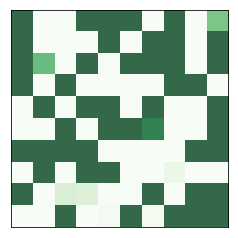

In [27]:
from quake import Earthquake

steve = Earthquake(10, fth=1.5)
viewer = Cell2DViewer(steve)
anim = viewer.animate(frames=10, interval=1000)


In [28]:
anim

In [4]:
plt.show()